In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib as mpl

from shapely.ops import cascaded_union
from shapely.wkt import dumps

In [2]:
pattern_areas = gpd.read_file('../.data/pattern_areas.geojson')

In [46]:
district_1 = pattern_areas[pattern_areas.Type == 'Central City'][['Type', 'geometry']].rename(index=str, columns={'Type':'name'})

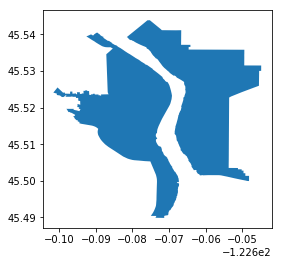

In [22]:
district_1.plot()

In [47]:
district_3 = pattern_areas[pattern_areas.Type == 'Eastern Neighborhoods'][['Type', 'geometry']].rename(index=str, columns={'Type':'name'})

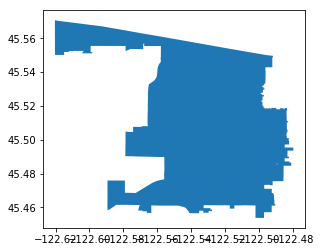

In [21]:
district_3.plot()

In [23]:
district_2_raw = pattern_areas[~((pattern_areas.Type == 'Central City') | (pattern_areas.Type == 'Eastern Neighborhoods'))]

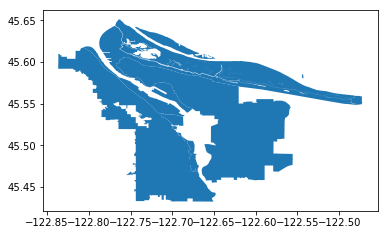

In [24]:
district_2_raw.plot()

In [30]:
district_2 = gpd.GeoDataFrame({'name': ['Inner Neighborhoods, Western Neighborhoods, River & Industrial']})
district_2['geometry'] = cascaded_union(district_2_raw.geometry.values)

ValueError: Length of values does not match length of index

In [35]:
district_2.geometry = [cascaded_union(district_2_raw.geometry.values)]

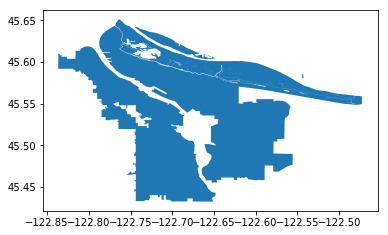

In [37]:
district_2.plot()

In [61]:
parking_districts = pd.concat([district_1, district_2, district_3], sort=False).reset_index()
parking_districts['wkt'] = parking_districts.geometry.map(dumps)
del parking_districts['geometry']
del parking_districts['index']

In [62]:
parking_districts.head()

,name,wkt
0,Central City,MULTIPOLYGON (((-122.6887759319999418 45.53975...
1,"Inner Neighborhoods, Western Neighborhoods, Ri...",MULTIPOLYGON (((-122.5440246789999605 45.58488...
2,Eastern Neighborhoods,POLYGON ((-122.5447269969999411 45.55864970300...


In [63]:
parking_districts.to_csv('../.data/parking_districts.csv', index=True, index_label='key')